In [1]:
# Key point pose estimator

from torch_snippets import *
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


In [2]:
cfg = get_cfg() # get a fresh new config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))

In [3]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold 
# for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.DEVICE = "cpu" # Forcing CPU usage because I was facing CUDA issues. This avoids runtime errors.
predictor = DefaultPredictor(cfg)

In [4]:
import cv2

im = cv2.imread("/home/mint/projects/humanPoseDetection/image.jpg", cv2.IMREAD_COLOR)

if im is None:
    raise ValueError("Failed to read image. Check the path.")

im = im[..., ::-1]  # BGR → RGB


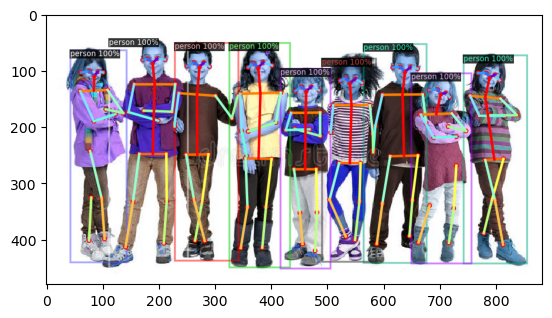

In [6]:

outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Suppress PyTorch meshgrid UserWarning about the upcoming indexing argument.
# This warning is harmless and does not affect predictions or visualization.
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="torch.meshgrid")

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(out.get_image())